In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
np.random.seed(42)
n_transactions = 500

# 1. GENERATE DATA TRANSAKSI
data = {
    'TransactionID': range(1, n_transactions + 1),
    'CustomerID': np.random.randint(1001, 1101, n_transactions), # Ada 100 Customer unik
    'Date': pd.date_range(start='2023-01-01', periods=n_transactions, freq='H'),
    'Amount_Spent': np.random.randint(50000, 1000000, n_transactions), # Rupiah
    'Category': np.random.choice(['Fashion', 'F&B', 'Electronics', 'Groceries'], n_transactions),
    'Payment_Method': np.random.choice(['Cash', 'Credit Card', 'E-Wallet', np.nan], n_transactions), # Ada NaN!
    'Membership_Status': np.random.choice(['Gold', 'Silver', 'Bronze'], n_transactions)
}

df_raw = pd.DataFrame(data)

# 2. KOTORI DATA (Bikin Duplikat & Outlier)
# Bikin duplikat transaksi
df_raw = pd.concat([df_raw, df_raw.iloc[:10]]) 

# Bikin data aneh (Outlier/Noise)
df_raw.loc[5, 'Amount_Spent'] = 100000000 # 100 Juta (Mungkin salah input)

print("Data Mentah Mall (Transaksi):")
print(df_raw.info())
display(df_raw.head())

/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Data Mentah Mall (Transaksi):
<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionID      510 non-null    int64         
 1   CustomerID         510 non-null    int64         
 2   Date               510 non-null    datetime64[ns]
 3   Amount_Spent       510 non-null    int64         
 4   Category           510 non-null    object        
 5   Payment_Method     510 non-null    object        
 6   Membership_Status  510 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 48.0+ KB
None


/tmp/ipykernel_6556/2236420295.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Date': pd.date_range(start='2023-01-01', periods=n_transactions, freq='H'),


,TransactionID,CustomerID,Date,Amount_Spent,Category,Payment_Method,Membership_Status
0,1,1052,2023-01-01 00:00:00,790427,Electronics,E-Wallet,Silver
1,2,1093,2023-01-01 01:00:00,562153,Electronics,Cash,Gold
2,3,1015,2023-01-01 02:00:00,117215,Fashion,nan,Gold
3,4,1072,2023-01-01 03:00:00,905474,Fashion,Cash,Silver
4,5,1061,2023-01-01 04:00:00,194356,F&B,Credit Card,Bronze


In [2]:
df_raw

,TransactionID,CustomerID,Date,Amount_Spent,Category,Payment_Method,Membership_Status
0,1,1052,2023-01-01 00:00:00,790427,Electronics,E-Wallet,Silver
1,2,1093,2023-01-01 01:00:00,562153,Electronics,Cash,Gold
2,3,1015,2023-01-01 02:00:00,117215,Fashion,nan,Gold
3,4,1072,2023-01-01 03:00:00,905474,Fashion,Cash,Silver
4,5,1061,2023-01-01 04:00:00,194356,F&B,Credit Card,Bronze
...,...,...,...,...,...,...,...
5,6,1021,2023-01-01 05:00:00,100000000,Groceries,E-Wallet,Bronze
6,7,1083,2023-01-01 06:00:00,405612,F&B,E-Wallet,Gold
7,8,1087,2023-01-01 07:00:00,504605,Fashion,E-Wallet,Gold
8,9,1075,2023-01-01 08:00:00,59435,F&B,nan,Bronze


In [5]:
df_raw.isnull().sum()

TransactionID        0
CustomerID           0
Date                 0
Amount_Spent         0
Category             0
Payment_Method       0
Membership_Status    0
dtype: int64

In [9]:
df_raw = df_raw.drop_duplicates()
df_raw.duplicated().sum()


np.int64(0)

In [10]:
df_raw

,TransactionID,CustomerID,Date,Amount_Spent,Category,Payment_Method,Membership_Status
0,1,1052,2023-01-01 00:00:00,790427,Electronics,E-Wallet,Silver
1,2,1093,2023-01-01 01:00:00,562153,Electronics,Cash,Gold
2,3,1015,2023-01-01 02:00:00,117215,Fashion,nan,Gold
3,4,1072,2023-01-01 03:00:00,905474,Fashion,Cash,Silver
4,5,1061,2023-01-01 04:00:00,194356,F&B,Credit Card,Bronze
...,...,...,...,...,...,...,...
495,496,1063,2023-01-21 15:00:00,381868,Groceries,Credit Card,Bronze
496,497,1069,2023-01-21 16:00:00,951791,Electronics,Cash,Silver
497,498,1022,2023-01-21 17:00:00,912129,Fashion,Cash,Bronze
498,499,1093,2023-01-21 18:00:00,603020,Groceries,Credit Card,Silver


In [12]:
df_raw.isnull().sum()

TransactionID        0
CustomerID           0
Date                 0
Amount_Spent         0
Category             0
Payment_Method       0
Membership_Status    0
dtype: int64

In [18]:
numeric = df_raw.select_dtypes('number').columns

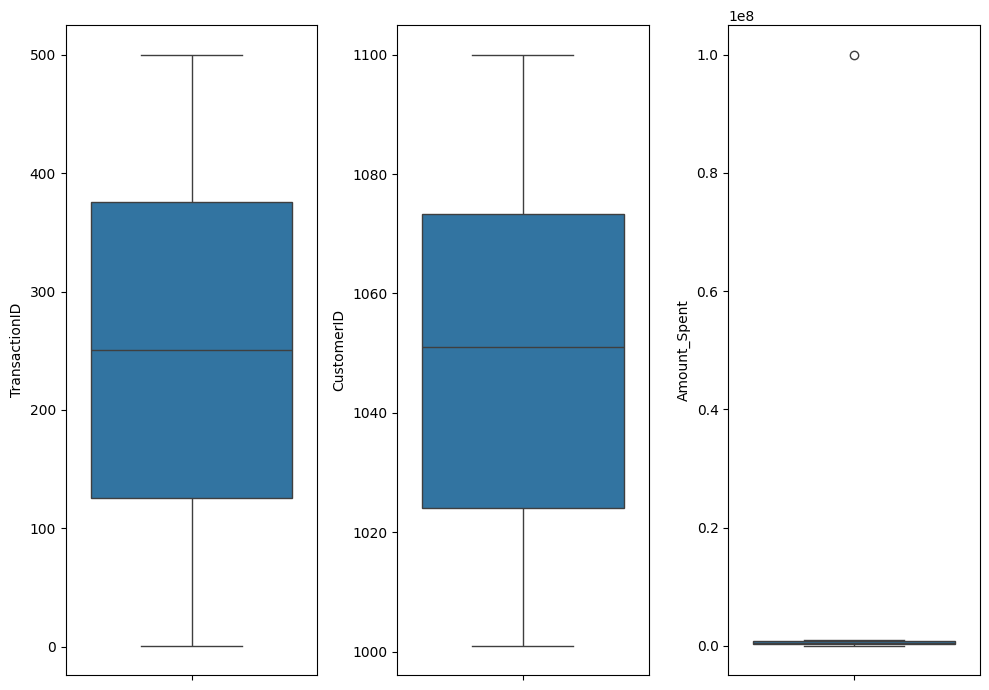

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
for i, column in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(df_raw[column])
plt.tight_layout()
plt.show()

In [47]:
q1 = df_raw[numeric].quantile(0.25)
q3 = df_raw[numeric].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

condition = ~((df_raw[numeric] < lower) | (df_raw[numeric] > upper)).any(axis=1)
numeric_features = df_raw.loc[condition, numeric]

numeric_features

,TransactionID,CustomerID,Amount_Spent
0,1,1052,790427
1,2,1093,562153
2,3,1015,117215
3,4,1072,905474
4,5,1061,194356
...,...,...,...
495,496,1063,381868
496,497,1069,951791
497,498,1022,912129
498,499,1093,603020


In [ ]:
numeric_features.isnull().sum()

TransactionID    0
CustomerID       0
Amount_Spent     0
dtype: int64

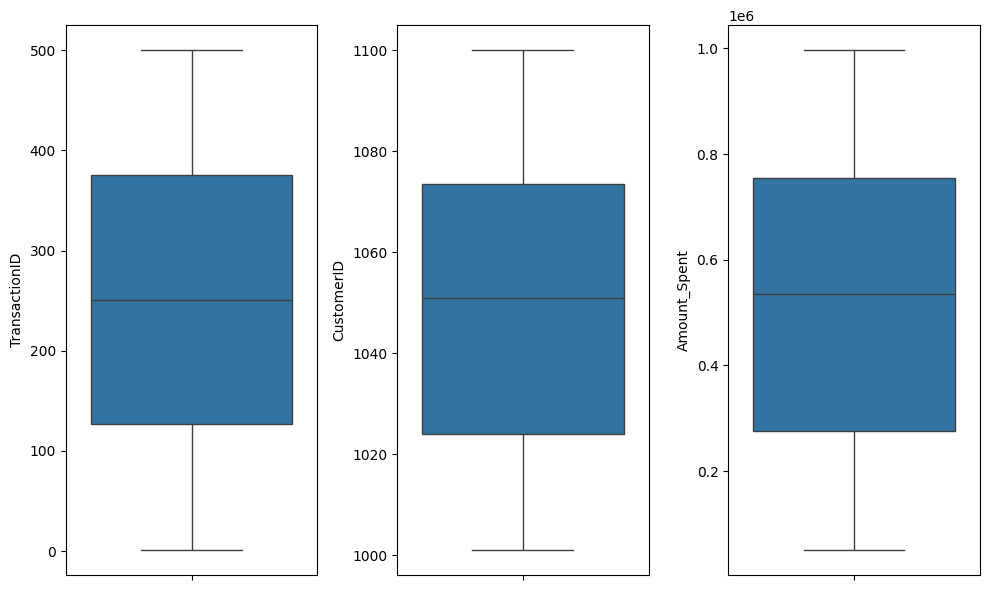

In [48]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(numeric_features[column])
plt.tight_layout()
plt.show()

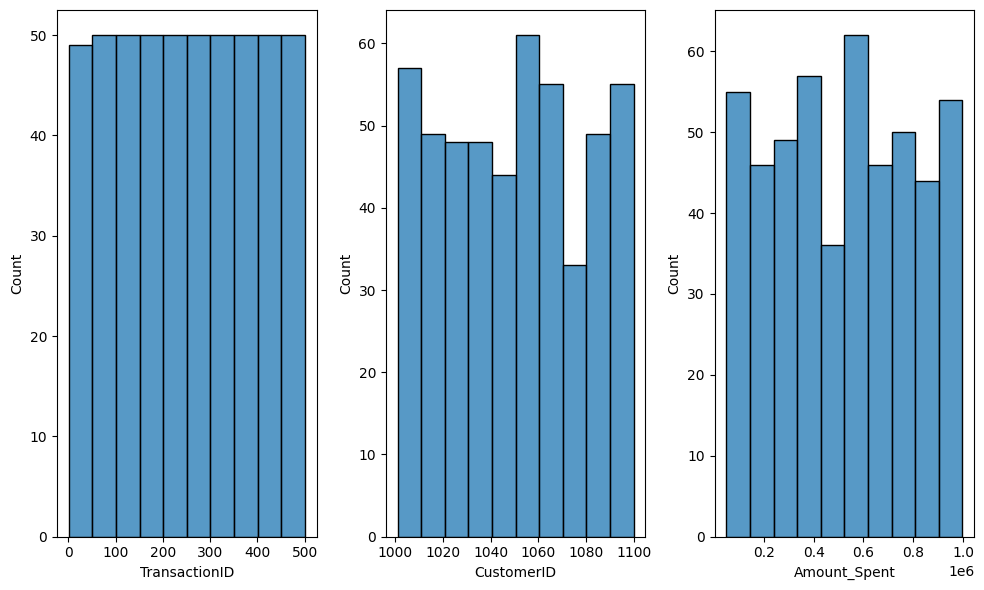

In [40]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    sns.histplot(feature_numeric[column])
plt.tight_layout()
plt.show()

In [50]:
numeric_features

,TransactionID,CustomerID,Amount_Spent
0,1,1052,790427
1,2,1093,562153
2,3,1015,117215
3,4,1072,905474
4,5,1061,194356
...,...,...,...
495,496,1063,381868
496,497,1069,951791
497,498,1022,912129
498,499,1093,603020


In [51]:
df_raw

,TransactionID,CustomerID,Date,Amount_Spent,Category,Payment_Method,Membership_Status
0,1,1052,2023-01-01 00:00:00,790427,Electronics,E-Wallet,Silver
1,2,1093,2023-01-01 01:00:00,562153,Electronics,Cash,Gold
2,3,1015,2023-01-01 02:00:00,117215,Fashion,nan,Gold
3,4,1072,2023-01-01 03:00:00,905474,Fashion,Cash,Silver
4,5,1061,2023-01-01 04:00:00,194356,F&B,Credit Card,Bronze
...,...,...,...,...,...,...,...
495,496,1063,2023-01-21 15:00:00,381868,Groceries,Credit Card,Bronze
496,497,1069,2023-01-21 16:00:00,951791,Electronics,Cash,Silver
497,498,1022,2023-01-21 17:00:00,912129,Fashion,Cash,Bronze
498,499,1093,2023-01-21 18:00:00,603020,Groceries,Credit Card,Silver


In [61]:
df_custumer = numeric_features.groupby('CustomerID').agg({
    'Amount_Spent' : ['sum', 'mean'],
    'TransactionID' : 'count'
}).reset_index()

df_custumer.columns = ['CustumerID', 'Total Belanja', 'Rata-rata Belanja',  'Frekuensi Belanja']
df_custumer

,CustumerID,Total Belanja,Rata-rata Belanja,Frekuensi Belanja
0,1001,3685154,409461.555556,9
1,1002,5365159,536515.900000,10
2,1003,1934078,276296.857143,7
3,1004,3021215,604243.000000,5
4,1005,1810166,603388.666667,3
...,...,...,...,...
94,1096,3864213,552030.428571,7
95,1097,4232540,529067.500000,8
96,1098,1429277,476425.666667,3
97,1099,4505153,450515.300000,10


# FEATURE SELECTION

In [118]:
df_custumer

,CustumerID,Total Belanja,Rata-rata Belanja,Frekuensi Belanja
0,1001,3685154,409461.555556,9
1,1002,5365159,536515.900000,10
2,1003,1934078,276296.857143,7
3,1004,3021215,604243.000000,5
4,1005,1810166,603388.666667,3
...,...,...,...,...
94,1096,3864213,552030.428571,7
95,1097,4232540,529067.500000,8
96,1098,1429277,476425.666667,3
97,1099,4505153,450515.300000,10


In [63]:
x = df_custumer.drop('CustumerID', axis=1)
x

,Total Belanja,Rata-rata Belanja,Frekuensi Belanja
0,3685154,409461.555556,9
1,5365159,536515.900000,10
2,1934078,276296.857143,7
3,3021215,604243.000000,5
4,1810166,603388.666667,3
...,...,...,...
94,3864213,552030.428571,7
95,4232540,529067.500000,8
96,1429277,476425.666667,3
97,4505153,450515.300000,10


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

x_scaled_df



,Total Belanja,Rata-rata Belanja,Frekuensi Belanja
0,0.712647,-0.731064,1.603275
1,1.843774,0.166731,2.008184
2,-0.466332,-1.672036,0.793458
3,0.265625,0.645306,-0.016360
4,-0.549760,0.639269,-0.826178
...,...,...,...
94,0.833205,0.276360,0.793458
95,1.081195,0.114099,1.198367
96,-0.806208,-0.257880,-0.826178
97,1.264742,-0.440969,2.008184


In [ ]:
categorical = df_raw.select_dtypes('object')

,Category,Payment_Method,Membership_Status
0,Electronics,E-Wallet,Silver
1,Electronics,Cash,Gold
2,Fashion,nan,Gold
3,Fashion,Cash,Silver
4,F&B,Credit Card,Bronze
...,...,...,...
495,Groceries,Credit Card,Bronze
496,Electronics,Cash,Silver
497,Fashion,Cash,Bronze
498,Groceries,Credit Card,Silver


In [113]:
df = pd.concat([numeric_features, categorical], axis=1)
df

,TransactionID,CustomerID,Amount_Spent,Category,Payment_Method,Membership_Status
0,1.0,1052.0,790427.0,Electronics,E-Wallet,Silver
1,2.0,1093.0,562153.0,Electronics,Cash,Gold
2,3.0,1015.0,117215.0,Fashion,nan,Gold
3,4.0,1072.0,905474.0,Fashion,Cash,Silver
4,5.0,1061.0,194356.0,F&B,Credit Card,Bronze
...,...,...,...,...,...,...
496,497.0,1069.0,951791.0,Electronics,Cash,Silver
497,498.0,1022.0,912129.0,Fashion,Cash,Bronze
498,499.0,1093.0,603020.0,Groceries,Credit Card,Silver
499,500.0,1067.0,695753.0,Fashion,E-Wallet,Bronze


In [110]:
df

Index(['TransactionID', 'CustomerID', 'Amount_Spent'], dtype='object')

Text(0.5, 0, 'Jumlah Cluster')

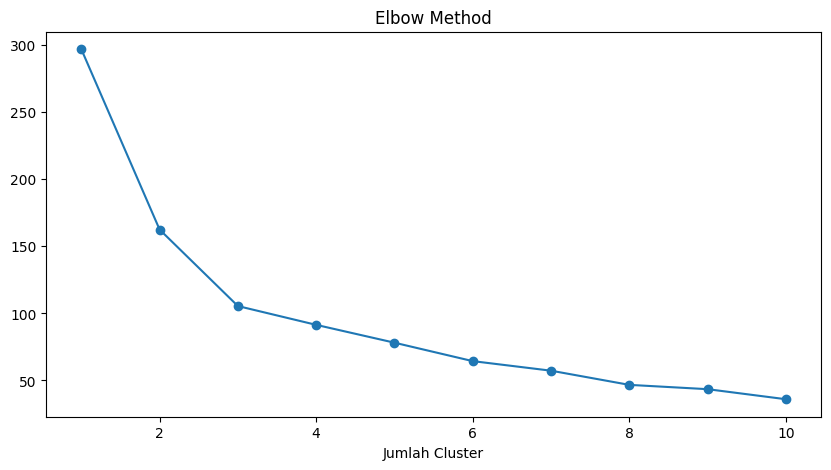

In [88]:
from sklearn.cluster import KMeans

inertia = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42 )
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')


In [119]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
cluster_label = kmeans_final.fit_predict(x_scaled)

df_custumer['Cluster Pelanggan'] = cluster_label

In [120]:
df_custumer

,CustumerID,Total Belanja,Rata-rata Belanja,Frekuensi Belanja,Cluster Pelanggan
0,1001,3685154,409461.555556,9,1
1,1002,5365159,536515.900000,10,1
2,1003,1934078,276296.857143,7,0
3,1004,3021215,604243.000000,5,2
4,1005,1810166,603388.666667,3,2
...,...,...,...,...,...
94,1096,3864213,552030.428571,7,1
95,1097,4232540,529067.500000,8,1
96,1098,1429277,476425.666667,3,0
97,1099,4505153,450515.300000,10,1


<Axes: xlabel='Total Belanja', ylabel='Frekuensi Belanja'>

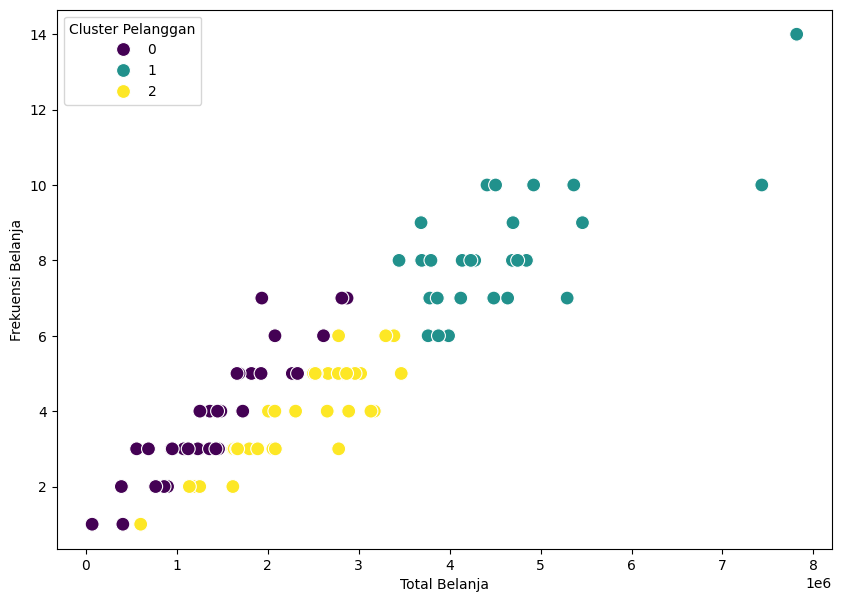

In [133]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_custumer, x = 'Total Belanja', y='Frekuensi Belanja', hue='Cluster Pelanggan', palette='viridis', s=100)

In [131]:
df_custumer.isnull().sum()

CustumerID           0
Total Belanja        0
Rata-rata Belanja    0
Frekuensi Belanja    0
Cluster Pelanggan    0
dtype: int64